In [1]:
# -1) dataset.zip 압축 해제
from google.colab import drive
drive.mount('/content/drive')
!unzip -q "/content/drive/MyDrive/dataset.zip" -d /content/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TF: 2.19.0
NUM_OBJECT_CLASSES: 6
NUM_MATERIAL_CLASSES: 3
총 샘플 수: 3000
train: 2400  / val: 600
object class_weight: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
material class_weight: {0: 1.0, 1: 0.6666666666666666, 2: 2.0}


Model: "mtl_efficientnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 1280)      │  4,049,571 │ image[0][0]       │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │    655,872 │ efficientnetb0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ material_output     │ (None, 3)         │        771 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ object_output       │ (None, 6)         │      1,542 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,970,412 (18.96 MB)

 Trainable params: 4,928,389 (18.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

steps_per_epoch: 75

[Stage 1] Freeze base and train heads...
Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.6787 - material_output_acc: 0.3677 - material_output_loss: 1.1100 - object_output_acc: 0.1740 - object_output_loss: 1.8673
Epoch 1: val_object_output_acc improved from -inf to 0.74833, saving model to /content/checkpoints/best.weights.h5
[Epoch 1] LR: 3.33333e-05
75/75 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - loss: 3.6761 - material_output_acc: 0.3689 - material_output_loss: 1.1089 - object_output_acc: 0.1748 - object_output_loss: 1.8662 - val_loss: 2.7933 - val_material_output_acc: 0.7667 - val_material_output_loss: 0.7916 - val_object_output_acc: 0.7483 - val_object_output_loss: 1.4318
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.5881 - material_output_acc: 0.7462 - material_output_loss: 0.7108 - object_output_acc: 0.6390 - object_output_loss: 1.3355
Epoch 2: val_object_output_acc improved from 0.74833 to 0.99000, saving model to /content/checkpoints/best.we

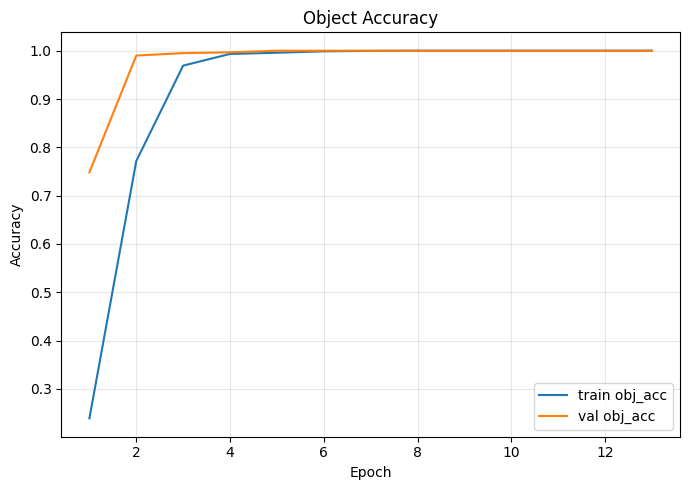

Saved: /content/plots/acc_object.png


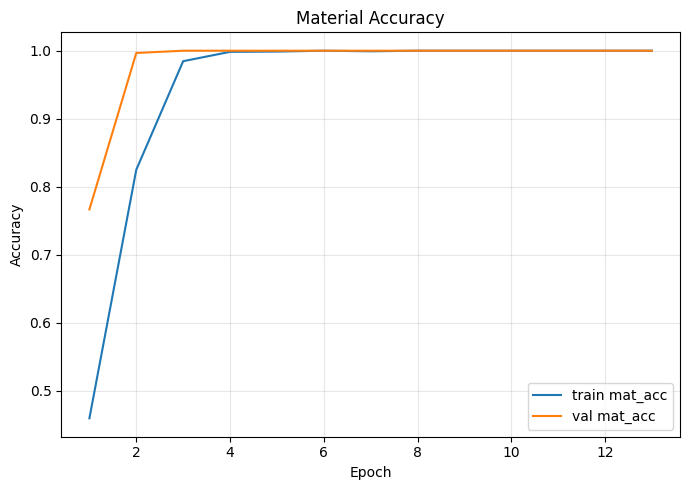

Saved: /content/plots/acc_material.png


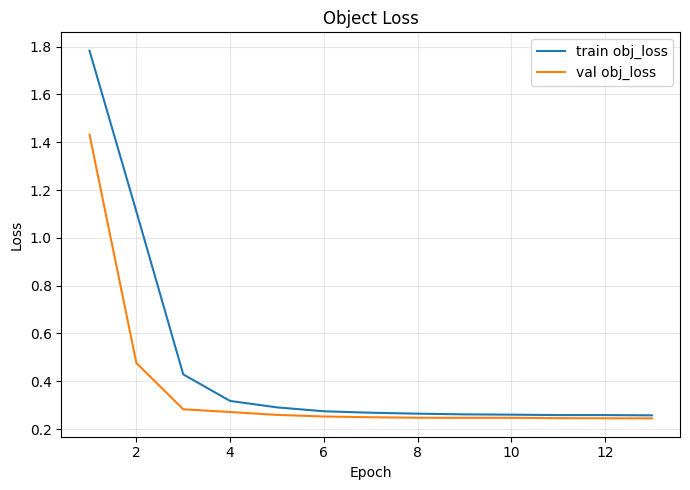

Saved: /content/plots/loss_object.png


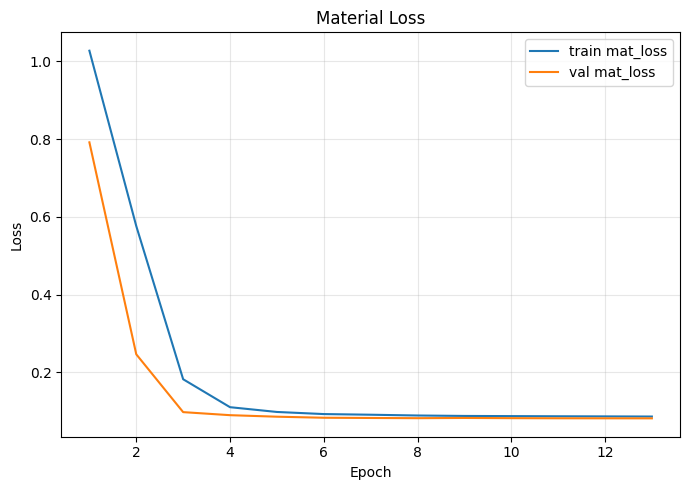

Saved: /content/plots/loss_material.png


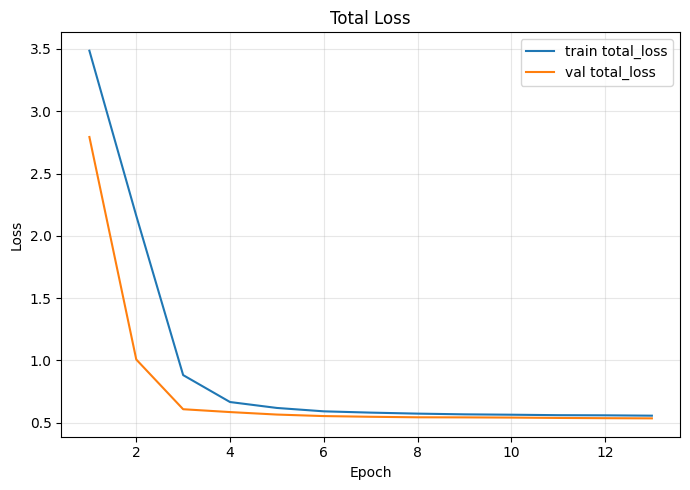

Saved: /content/plots/loss_total.png


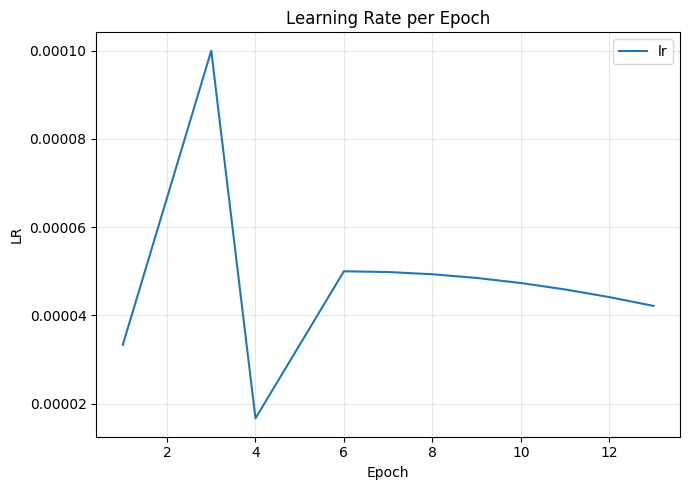

Saved: /content/plots/lr_per_epoch.png
Classification reports saved to: /content/plots/classification_report.txt


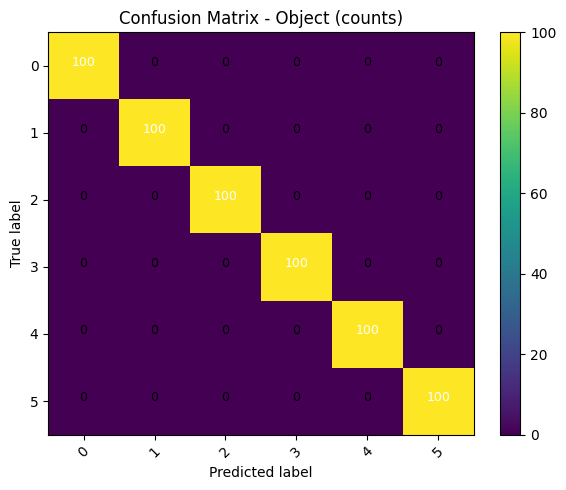

Saved: /content/plots/cm_object_counts.png


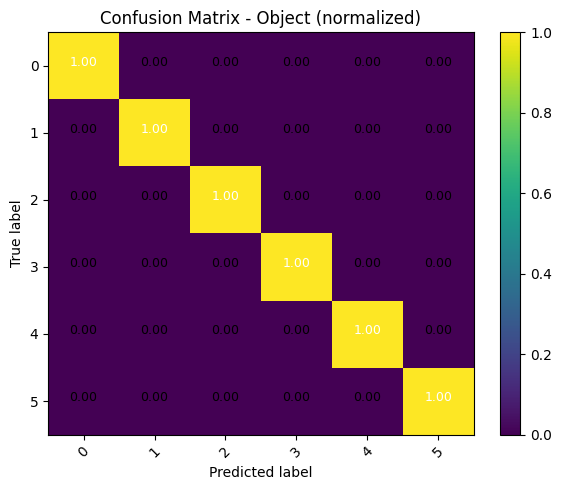

Saved: /content/plots/cm_object_norm.png


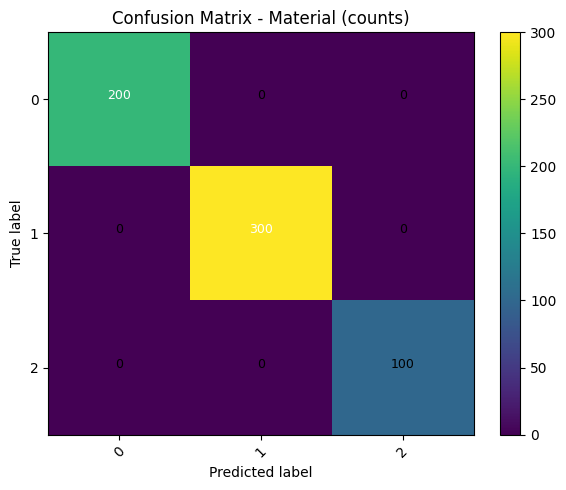

Saved: /content/plots/cm_material_counts.png


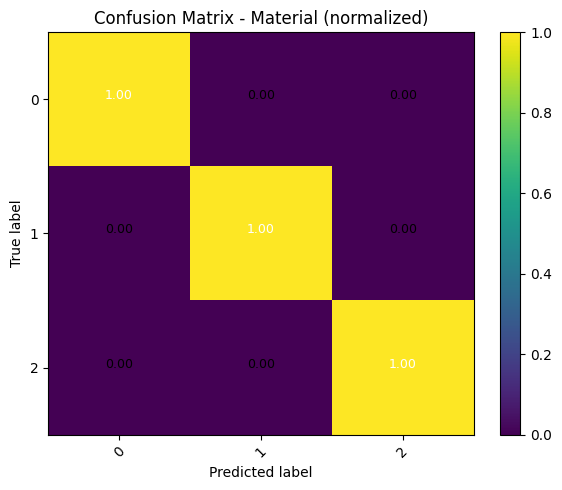

Saved: /content/plots/cm_material_norm.png

✅ 완료!
- Best weights: /content/checkpoints/best.weights.h5
- Saved model:  /content/saved_model/mtl_efficientnet_keras3.keras
- Plots/report: /content/plots


In [4]:
# =========================================
# TensorFlow 2.19 / Keras 3
# Multi-Head(EfficientNetB0) + AdamW(Warmup+Cosine)
# - outputs=dict + sample_weight(dict)  (KeyError/TypeError 회피)
# - WarmupCosine 직렬화 지원(get_config + register_keras_serializable) ← ★ 이번 fix
# - BN 동결 + 상단 30% Unfreeze
# - 시각화/리포트/혼동행렬 저장, 체크포인트 *.weights.h5
# =========================================

import os, math, gc, itertools
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from collections import Counter

tf.keras.backend.clear_session(); gc.collect()
print("TF:", tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE
SEED = 42
tf.keras.utils.set_random_seed(SEED)

# ---------- 경로/HP ----------
CSV_PATH     = "/content/labels.csv"
IMAGES_ROOT  = "/content/images"
SAVE_DIR     = "/content/saved_model"
CKPT_DIR     = "/content/checkpoints"
PLOTS_DIR    = "/content/plots"
os.makedirs(SAVE_DIR, exist_ok=True)
os.makedirs(CKPT_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

IMG_SIZE     = (224, 224)
BATCH_SIZE   = 32
EPOCHS       = 30
STAGE1_EPOCHS= 3
FROM_LOGITS  = False
INITIAL_LR   = 1e-4

# ---------- CSV 로드 ----------
df = pd.read_csv(CSV_PATH)
required = {"image_path", "object_label", "material_label"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"labels.csv에 필요한 컬럼이 없습니다: {missing}")

def to_abs(p):
    if isinstance(p, str) and os.path.isabs(p):
        return p
    return os.path.join(IMAGES_ROOT, p)

df["filepath"] = df["image_path"].apply(to_abs)
df["object_label"]   = df["object_label"].astype(int)
df["material_label"] = df["material_label"].astype(int)

NUM_OBJECT_CLASSES   = int(df["object_label"].max()) + 1
NUM_MATERIAL_CLASSES = int(df["material_label"].max()) + 1
print("NUM_OBJECT_CLASSES:", NUM_OBJECT_CLASSES)
print("NUM_MATERIAL_CLASSES:", NUM_MATERIAL_CLASSES)
print("총 샘플 수:", len(df))

# ---------- Split ----------
train_df, val_df = train_test_split(
    df, test_size=0.2, random_state=SEED, stratify=df["object_label"]
)
print("train:", len(train_df), " / val:", len(val_df))

# ---------- class_weight → sample_weight 벡터 ----------
def make_class_weight(y, num_classes):
    cnt = Counter(y.tolist())
    total = sum(cnt.values())
    return {i: total / (num_classes * max(cnt.get(i, 1), 1)) for i in range(num_classes)}

obj_w = make_class_weight(train_df["object_label"].values.astype(int), NUM_OBJECT_CLASSES)
mat_w = make_class_weight(train_df["material_label"].values.astype(int), NUM_MATERIAL_CLASSES)
obj_weight_vec = tf.constant([obj_w.get(i, 1.0) for i in range(NUM_OBJECT_CLASSES)], dtype=tf.float32)
mat_weight_vec = tf.constant([mat_w.get(i, 1.0) for i in range(NUM_MATERIAL_CLASSES)], dtype=tf.float32)
print("object class_weight:", obj_w)
print("material class_weight:", mat_w)

# ---------- tf.data ----------
from tensorflow.keras.applications.efficientnet import preprocess_input

def decode_and_preprocess(path, img_size):
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)
    img.set_shape(img_size + (3,))
    return img

data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", seed=SEED),
    tf.keras.layers.RandomRotation(0.05, fill_mode="nearest", seed=SEED),
    tf.keras.layers.RandomZoom(0.1, seed=SEED),
    tf.keras.layers.RandomTranslation(0.05, 0.05, fill_mode="nearest", seed=SEED),
    tf.keras.layers.RandomContrast(0.1, seed=SEED),
], name="data_augment")

def make_ds(frame, img_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=True, augment=True,
            weight_vecs=None):
    paths = frame["filepath"].values
    y_obj = frame["object_label"].values.astype(np.int32)
    y_mat = frame["material_label"].values.astype(np.int32)

    ds = tf.data.Dataset.from_tensor_slices((paths, y_obj, y_mat))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(frame), seed=SEED, reshuffle_each_iteration=True)

    def _map(path, o, m):
        img = decode_and_preprocess(path, img_size)
        if augment:
            img = data_augment(img)
        o = tf.cast(o, tf.int32)
        m = tf.cast(m, tf.int32)
        labels = {
            "object_output":   tf.expand_dims(o, axis=-1),
            "material_output": tf.expand_dims(m, axis=-1),
        }
        if weight_vecs is None:
            obj_sw = tf.constant(1.0, tf.float32)
            mat_sw = tf.constant(1.0, tf.float32)
        else:
            obj_vec, mat_vec = weight_vecs
            obj_sw = tf.gather(obj_vec, o)
            mat_sw = tf.gather(mat_vec, m)
        sample_weights = {
            "object_output":   tf.cast(obj_sw, tf.float32),
            "material_output": tf.cast(mat_sw, tf.float32),
        }
        return img, labels, sample_weights

    ds = ds.map(_map, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

train_ds = make_ds(train_df, augment=True,  shuffle=True,  weight_vecs=(obj_weight_vec, mat_weight_vec))
val_ds   = make_ds(val_df,   augment=False, shuffle=False, weight_vecs=None)

# ---------- Loss ----------
def make_sparse_cce_with_ls(num_classes, label_smoothing=0.0, from_logits=False, axis=-1, name="loss"):
    base = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing=label_smoothing, from_logits=from_logits, axis=axis, name=name
    )
    def loss(y_true, y_pred):
        y_true = tf.cast(tf.squeeze(y_true, axis=-1), tf.int32)
        y_true_oh = tf.one_hot(y_true, depth=num_classes)
        return base(y_true_oh, y_pred)
    return loss

# ---------- Model ----------
def build_model(img_size=IMG_SIZE,
                num_object=NUM_OBJECT_CLASSES,
                num_material=NUM_MATERIAL_CLASSES,
                from_logits=False):
    reg = tf.keras.regularizers.l2(1e-4)
    inputs = tf.keras.Input(shape=img_size + (3,), name="image")

    base = tf.keras.applications.EfficientNetB0(
        include_top=False, input_shape=img_size + (3,), pooling="avg"
    )
    x = base(inputs)

    x = tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=reg)(x)
    x = tf.keras.layers.Dropout(0.4)(x)

    h1 = tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=reg)(x)
    h1 = tf.keras.layers.Dropout(0.3)(h1)
    act1 = None if from_logits else "softmax"
    object_output = tf.keras.layers.Dense(num_object, activation=act1, name="object_output")(h1)

    h2 = tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=reg)(x)
    h2 = tf.keras.layers.Dropout(0.3)(h2)
    act2 = None if from_logits else "softmax"
    material_output = tf.keras.layers.Dense(num_material, activation=act2, name="material_output")(h2)

    model = tf.keras.Model(
        inputs=inputs,
        outputs={"object_output": object_output, "material_output": material_output},
        name="mtl_efficientnet"
    )
    return model, base

model, base = build_model(from_logits=FROM_LOGITS)
model.summary()

# ---------- LR 스케줄 ----------
steps_per_epoch = math.ceil(len(train_df) / BATCH_SIZE)
print("steps_per_epoch:", steps_per_epoch)

@tf.keras.utils.register_keras_serializable(package="custom")
class WarmupCosine(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, base_lr, total_steps, warmup_steps, final_lr_ratio=1e-6, name="WarmupCosine"):
        super().__init__()
        self.base_lr = float(base_lr)
        self.total_steps = int(total_steps)
        self.warmup_steps = int(warmup_steps)
        self.final_lr_ratio = float(final_lr_ratio)
        self.name = name
        self.final_lr = self.base_lr * self.final_lr_ratio

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        warm = tf.where(
            step < self.warmup_steps,
            self.base_lr * (step / tf.maximum(1.0, tf.cast(self.warmup_steps, tf.float32))),
            0.0,
        )
        cos = self.final_lr + 0.5 * (self.base_lr - self.final_lr) * (1 + tf.cos(
            math.pi * (step - tf.cast(self.warmup_steps, tf.float32)) /
            tf.maximum(1.0, tf.cast(self.total_steps - self.warmup_steps, tf.float32))
        ))
        return tf.where(step < self.warmup_steps, warm, cos)

    def get_config(self):
        return {
            "base_lr": self.base_lr,
            "total_steps": self.total_steps,
            "warmup_steps": self.warmup_steps,
            "final_lr_ratio": self.final_lr_ratio,
            "name": self.name,
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

total_steps  = steps_per_epoch * EPOCHS
warmup_steps = int(0.1 * total_steps)
lr_schedule  = WarmupCosine(INITIAL_LR, total_steps, warmup_steps)
opt = tf.keras.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=1e-5, clipnorm=1.0)

# ---------- Compile ----------
losses = {
    "object_output":   make_sparse_cce_with_ls(NUM_OBJECT_CLASSES,   label_smoothing=0.05, from_logits=FROM_LOGITS, name="obj_loss"),
    "material_output": make_sparse_cce_with_ls(NUM_MATERIAL_CLASSES, label_smoothing=0.02, from_logits=FROM_LOGITS, name="mat_loss"),
}
metrics = {
    "object_output":   [tf.keras.metrics.SparseCategoricalAccuracy(name="acc")],
    "material_output": [tf.keras.metrics.SparseCategoricalAccuracy(name="acc")],
}
loss_weights = {"object_output": 1.3, "material_output": 1.0}
model.compile(optimizer=opt, loss=losses, loss_weights=loss_weights, metrics=metrics)

# ---------- Callbacks ----------
epoch_lrs = []
def _log_lr(epoch, logs=None):
    iters = tf.keras.backend.get_value(model.optimizer.iterations)
    lr_t = model.optimizer.learning_rate(iters) if callable(model.optimizer.learning_rate) else model.optimizer.learning_rate
    lr_val = float(tf.keras.backend.get_value(lr_t))
    epoch_lrs.append(lr_val)
    print(f"[Epoch {epoch+1}] LR: {lr_val:.6g}")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(CKPT_DIR, "best.weights.h5"),
        monitor="val_object_output_acc", mode="max",
        save_best_only=True, save_weights_only=True, verbose=1,
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_object_output_acc", patience=8, mode="max",
        restore_best_weights=True, verbose=1,
    ),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=_log_lr),
]

# ---------- 2단계 파인튜닝 ----------
# Stage 1: 전체 동결
for l in base.layers:
    l.trainable = False
model.compile(optimizer=opt, loss=losses, loss_weights=loss_weights, metrics=metrics)

print("\n[Stage 1] Freeze base and train heads...")
history1 = model.fit(
    train_ds, validation_data=val_ds,
    epochs=STAGE1_EPOCHS, callbacks=callbacks
)

# Stage 2: 상위 30%만 해제(BN은 계속 동결)
cutoff = int(0.7 * len(base.layers))
for i, layer in enumerate(base.layers):
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = (i >= cutoff)

fine_lr_schedule = WarmupCosine(INITIAL_LR * 0.5, total_steps, warmup_steps)
fine_opt = tf.keras.optimizers.AdamW(learning_rate=fine_lr_schedule, weight_decay=1e-5, clipnorm=1.0)
model.compile(optimizer=fine_opt, loss=losses, loss_weights=loss_weights, metrics=metrics)

remain_epochs = max(EPOCHS - STAGE1_EPOCHS, 1)
print("\n[Stage 2] Unfreeze top layers and fine-tune...")
history2 = model.fit(
    train_ds, validation_data=val_ds,
    epochs=remain_epochs, callbacks=callbacks
)

# ---------- Save + history ----------
save_path = os.path.join(SAVE_DIR, "mtl_efficientnet_keras3.keras")
model.save(save_path)  # 필요 시: model.save(save_path, include_optimizer=False)
print("Model saved to:", save_path)

def hist_to_df(h): return pd.DataFrame(h.history)
hist_df = pd.concat([hist_to_df(history1), hist_to_df(history2)], ignore_index=True)
hist_csv = os.path.join(PLOTS_DIR, "history.csv")
hist_df.to_csv(hist_csv, index=False)
print("History saved to:", hist_csv)

# ---------- 플롯 ----------
def plot_and_save(x, ys, labels, title, ylabel, out_png):
    plt.figure(figsize=(7,5))
    for y, lbl in zip(ys, labels):
        plt.plot(x, y, label=lbl)
    plt.title(title); plt.xlabel("Epoch"); plt.ylabel(ylabel)
    plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout()
    plt.savefig(out_png, dpi=150); plt.show()
    print(f"Saved: {out_png}")

epochs_range = range(1, len(hist_df) + 1)

def safe_col(df_, name):
    return df_[name] if name in df_.columns else pd.Series([np.nan]*len(df_))

plot_and_save(epochs_range,
    [safe_col(hist_df,"object_output_acc"), safe_col(hist_df,"val_object_output_acc")],
    ["train obj_acc", "val obj_acc"], "Object Accuracy", "Accuracy",
    os.path.join(PLOTS_DIR, "acc_object.png"),
)
plot_and_save(epochs_range,
    [safe_col(hist_df,"material_output_acc"), safe_col(hist_df,"val_material_output_acc")],
    ["train mat_acc", "val mat_acc"], "Material Accuracy", "Accuracy",
    os.path.join(PLOTS_DIR, "acc_material.png"),
)
plot_and_save(epochs_range,
    [safe_col(hist_df,"object_output_loss"), safe_col(hist_df,"val_object_output_loss")],
    ["train obj_loss", "val obj_loss"], "Object Loss", "Loss",
    os.path.join(PLOTS_DIR, "loss_object.png"),
)
plot_and_save(epochs_range,
    [safe_col(hist_df,"material_output_loss"), safe_col(hist_df,"val_material_output_loss")],
    ["train mat_loss", "val mat_loss"], "Material Loss", "Loss",
    os.path.join(PLOTS_DIR, "loss_material.png"),
)
plot_and_save(epochs_range,
    [safe_col(hist_df,"loss"), safe_col(hist_df,"val_loss")],
    ["train total_loss", "val total_loss"], "Total Loss", "Loss",
    os.path.join(PLOTS_DIR, "loss_total.png"),
)
plot_and_save(range(1, len(epoch_lrs)+1),
    [epoch_lrs], ["lr"], "Learning Rate per Epoch", "LR",
    os.path.join(PLOTS_DIR, "lr_per_epoch.png"),
)

# ---------- 검증 예측/리포트 ----------
val_x_ds = val_ds.map(lambda x, *_: x)

y_obj_true, y_mat_true = [], []
for _, labels, _ in val_ds:
    y_obj_true.extend(labels["object_output"].numpy().squeeze().tolist())
    y_mat_true.extend(labels["material_output"].numpy().squeeze().tolist())
y_obj_true = np.array(y_obj_true, dtype=int)
y_mat_true = np.array(y_mat_true, dtype=int)

preds = model.predict(val_x_ds, verbose=0)
obj_prob = preds["object_output"]
mat_prob = preds["material_output"]
y_obj_pred = obj_prob.argmax(axis=1)
y_mat_pred = mat_prob.argmax(axis=1)

report_txt = os.path.join(PLOTS_DIR, "classification_report.txt")
with open(report_txt, "w") as f:
    f.write("[Object Head]\n")
    f.write(classification_report(y_obj_true, y_obj_pred, digits=4))
    f.write("\n\n[Material Head]\n")
    f.write(classification_report(y_mat_true, y_mat_pred, digits=4))
print(f"Classification reports saved to: {report_txt}")

def plot_confusion_matrix(cm, classes, title, out_png, normalize=False):
    if normalize:
        cm = cm.astype("float") / (cm.sum(axis=1, keepdims=True) + 1e-12)
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation="nearest", aspect="auto")
    plt.title(title); plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45); plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2. if cm.size else 0.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = cm[i, j]
        txt = f"{val:.2f}" if normalize else str(val)
        plt.text(j, i, txt, ha="center",
                 color="white" if val > thresh else "black", fontsize=9)
    plt.ylabel("True label"); plt.xlabel("Predicted label")
    plt.tight_layout(); plt.savefig(out_png, dpi=150); plt.show()
    print(f"Saved: {out_png}")

cm_obj = confusion_matrix(y_obj_true, y_obj_pred, labels=list(range(NUM_OBJECT_CLASSES)))
cm_mat = confusion_matrix(y_mat_true, y_mat_pred, labels=list(range(NUM_MATERIAL_CLASSES)))

plot_confusion_matrix(
    cm_obj, classes=[str(i) for i in range(NUM_OBJECT_CLASSES)],
    title="Confusion Matrix - Object (counts)",
    out_png=os.path.join(PLOTS_DIR, "cm_object_counts.png"),
    normalize=False
)
plot_confusion_matrix(
    cm_obj, classes=[str(i) for i in range(NUM_OBJECT_CLASSES)],
    title="Confusion Matrix - Object (normalized)",
    out_png=os.path.join(PLOTS_DIR, "cm_object_norm.png"),
    normalize=True
)
plot_confusion_matrix(
    cm_mat, classes=[str(i) for i in range(NUM_MATERIAL_CLASSES)],
    title="Confusion Matrix - Material (counts)",
    out_png=os.path.join(PLOTS_DIR, "cm_material_counts.png"),
    normalize=False
)
plot_confusion_matrix(
    cm_mat, classes=[str(i) for i in range(NUM_MATERIAL_CLASSES)],
    title="Confusion Matrix - Material (normalized)",
    out_png=os.path.join(PLOTS_DIR, "cm_material_norm.png"),
    normalize=True
)

print("\n✅ 완료!")
print(f"- Best weights: {os.path.join(CKPT_DIR, 'best.weights.h5')}")
print(f"- Saved model:  {save_path}")
print(f"- Plots/report: {PLOTS_DIR}")
